# U-Net Based Spatial Resolution Enhancement for Geospatial Data


# Data Used and Curation

Datasource for MODIS-1km-16Day: https://search.earthdata.nasa.gov/search?q=C2565788905-LPCLOUD

Datasource for TROPOSIF-June-2019: https://ftp.sron.nl/open-access-data-2/TROPOMI/tropomi/sif/v2.1/l2b/


Refer to **data_curation.ipynb** for steps on how data is extracted and curated.

**QGIS** is used as the primary geographic information system software for data curation.

Data formats:
        
        TROPOMI_SIF:      **NETCDF format**
        
        MODIS:            **HDF format**

### Import necessary libraries

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Integrated SIF-MODIS datasets

In [67]:
# ensure constant shape of data even across variable temporal set
# consider lower resolution data as input against higher resolution target

seven_data = pd.read_csv('SIF_MODIS_Integrated_7x14km_25_MAY_09_JUNE.csv')
three_data = pd.read_csv('SIF_MODIS_Integrated_3.5x7km_25_MAY_09_JUNE.csv')

seven2 = pd.read_csv('SIF_MODIS_Integrated_7x14km_10_JUNE_25_JUNE.csv')
three2 = pd.read_csv('SIF_MODIS_Integrated_3.5x7km_10_JUNE_25_JUNE.csv')

three_data.drop(['fid', 'Window'], axis=1, inplace=True)
three2.drop(['fid'], axis=1, inplace=True)

seven_data['Window'] = 0
three_data['Window'] = 0
seven2['Window'] = 1
three2['Window'] = 1

print(seven_data.shape, three_data.shape, seven2.shape, three2.shape)

(16603, 17) (16603, 17) (16586, 17) (16586, 17)


In [68]:
three2.head()

sif_mean_735  sif_mean_743   longitude   latitude  B_REFL_mean  \
0      0.588446      0.593294 -100.961570  49.762859   461.000000   
1      0.926404      1.064461 -100.915709  49.762859   491.280000   
2      0.721843      0.925304 -100.823989  49.762859   508.478261   
3      0.467859      0.821799 -100.686408  49.762859   472.304348   
4      0.777352      1.183632 -100.594687  49.762859   383.040000   

      EVI_mean  MIR_REFL_mean    NDVI_mean  NIR_REFL_mean  PXL_REL_mean  \
0  3111.916667    2015.625000  5034.541667    2713.083333      2.333333   
1  3049.560000    2066.960000  4851.120000    2745.400000      2.000000   
2  3445.565217    1649.043478  5179.695652    3021.521739           NaN   
3  3197.652174    1445.260870  5135.521739    2729.565217      1.000000   
4  3696.920000    1292.333333  5915.000000    2843.880000      1.000000   

   R_REFL_mean      RAA_mean     SZA_mean  VIQ     VZA_mean  COMP_mean  Window  
0   878.652174    743.500000  2922.750000  NaN  2389.250000      169.8       1  
1   945.000000  -1802.260870  2910.200000  NaN  2645.086957      173.0       1  
2   962.086957  -4736.157895  3004.363636  NaN  2848.863636        NaN       1  
3   876.826087   4716.888889  2846.166667  NaN  2112.142857      175.0       1  
4   727.040000  11554.523810  2780.200000  NaN  1844.960000        NaN       1

In [69]:
three_data.head(5)

sif_mean_735  sif_mean_743   longitude   latitude  B_REFL_mean  COMP_mean  \
0      0.686501      0.883585 -100.502966  49.762859   566.200000        NaN   
1      0.204931      0.312943 -100.457106  49.762859   584.115385      157.0   
2      0.152724      0.336108 -100.365385  49.762859   575.153846      157.0   
3      0.283762      0.278045 -100.319525  49.762859   545.807692      157.0   
4      0.291853      0.370085 -100.273665  49.762859   540.130435      157.0   

      EVI_mean  MIR_REFL_mean    NDVI_mean  NIR_REFL_mean  PXL_REL_mean  \
0  1904.458333    2100.320000  3345.600000    2201.040000           NaN   
1  1561.538462    2351.269231  2888.346154    1983.769231           NaN   
2  1640.576923    2441.576923  3011.500000    1999.461538           NaN   
3  2041.807692    2213.600000  3622.807692    2189.500000           NaN   
4  1786.304348    2583.086957  3345.304348    2002.739130           NaN   

       RAA_mean  R_REFL_mean     SZA_mean  VIQ_mean    VZA_mean  Window  
0  12167.791667  1089.480000  2946.625000       NaN  138.560000       0  
1  11956.240000  1093.884615  2904.818182       NaN  320.160000       0  
2  11938.363636  1071.615385  2892.363636       NaN  429.739130       0  
3  11920.720000  1025.269231  2914.250000       NaN  482.960000       0  
4  12004.000000  1005.434783  2890.888889       NaN  627.772727       0

### Cross-match (longitude, latitude) values for persistent co-ordinates on either dataset

In [70]:
for idx, row in seven_data.iterrows():
    if row['longitude'] != three_data.loc[idx, 'longitude']:
        print('Longitude mismatch at index:', idx)
    if row['latitude'] != three_data.loc[idx, 'latitude']:
        print('Latitude mismatch at index:', idx)


for idx, row in three_data.iterrows():
    if row['longitude'] != seven_data.loc[idx, 'longitude']:
        print('Longitude mismatch at index:', idx)
    if row['latitude'] != seven_data.loc[idx, 'latitude']:
        print('Latitude mismatch at index:', idx)

### Dealing with NaN values

In [71]:
print(np.isnan(seven2).any())

longitude        False
latitude         False
sif_mean_735     False
sif_mean_743     False
B_REFL_mean      False
COMP_mean        False
EVI_mean          True
MIR_REFL_mean    False
NDVI_mean         True
NIR_REFL_mean     True
PXL_REL_mean     False
R_REFL_mean      False
RAA_mean          True
SZA_mean         False
VIQ_mean         False
VZA_mean          True
Window           False
dtype: bool


In [72]:
# print(np.isnan(seven_data).any())
seven_data['COMP_mean'].fillna(0, inplace=True)
seven_data['PXL_REL_mean'].fillna(0, inplace=True)
seven_data['VIQ_mean'].fillna(0, inplace=True)
print(np.isnan(seven_data).any())

longitude        False
latitude         False
sif_mean_735     False
sif_mean_743     False
B_REFL_mean      False
COMP_mean        False
EVI_mean         False
MIR_REFL_mean    False
NDVI_mean        False
NIR_REFL_mean    False
PXL_REL_mean     False
RAA_mean         False
R_REFL_mean      False
SZA_mean         False
VIQ_mean         False
VZA_mean         False
Window           False
dtype: bool


C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\2389619088.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seven_data['COMP_mean'].fillna(0, inplace=True)
C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\2389619088.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [73]:
# print(np.isnan(three_data).any())
three_data['COMP_mean'].fillna(0, inplace=True)
three_data['PXL_REL_mean'].fillna(0, inplace=True)
three_data['VIQ_mean'].fillna(0, inplace=True)
print(np.isnan(three_data).any())

sif_mean_735     False
sif_mean_743     False
longitude        False
latitude         False
B_REFL_mean      False
COMP_mean        False
EVI_mean         False
MIR_REFL_mean    False
NDVI_mean        False
NIR_REFL_mean    False
PXL_REL_mean     False
RAA_mean         False
R_REFL_mean      False
SZA_mean         False
VIQ_mean         False
VZA_mean         False
Window           False
dtype: bool


C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\497433457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  three_data['COMP_mean'].fillna(0, inplace=True)
C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\497433457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

### Plot Correlation Matrix, considering sif_743 as target variable

<AxesSubplot: title={'center': 'Correlation Matrix for SIF-MODIS for 7x14 km'}>

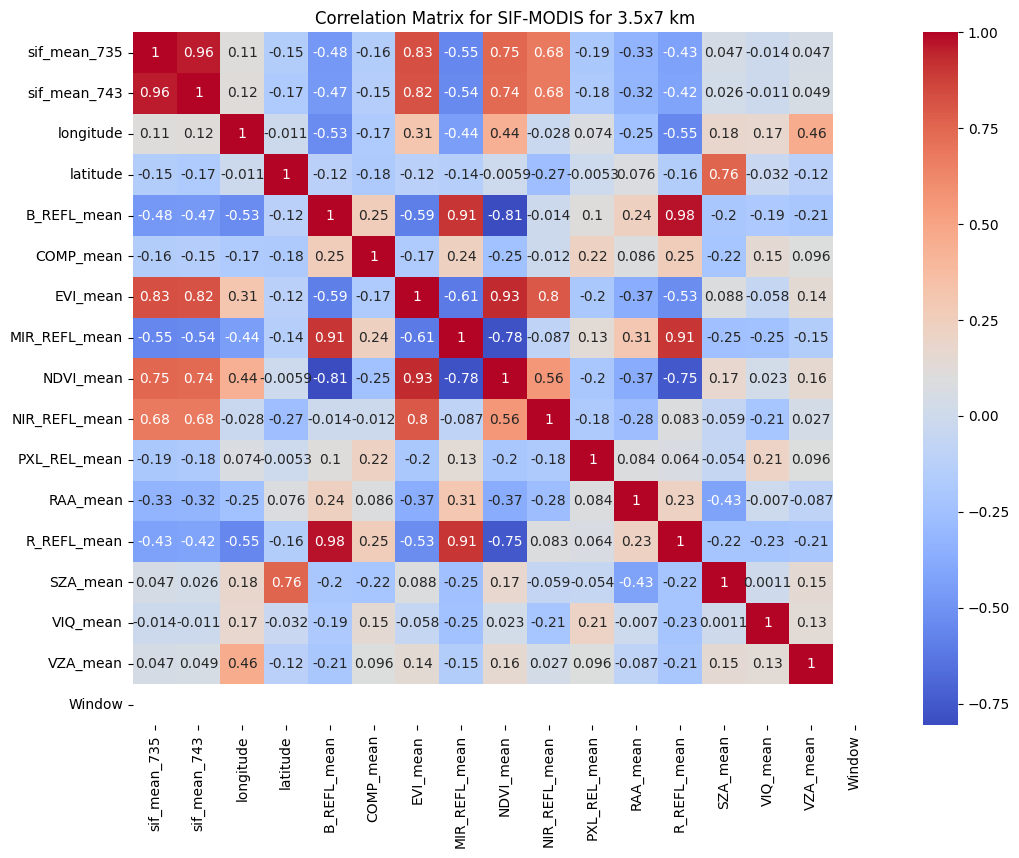

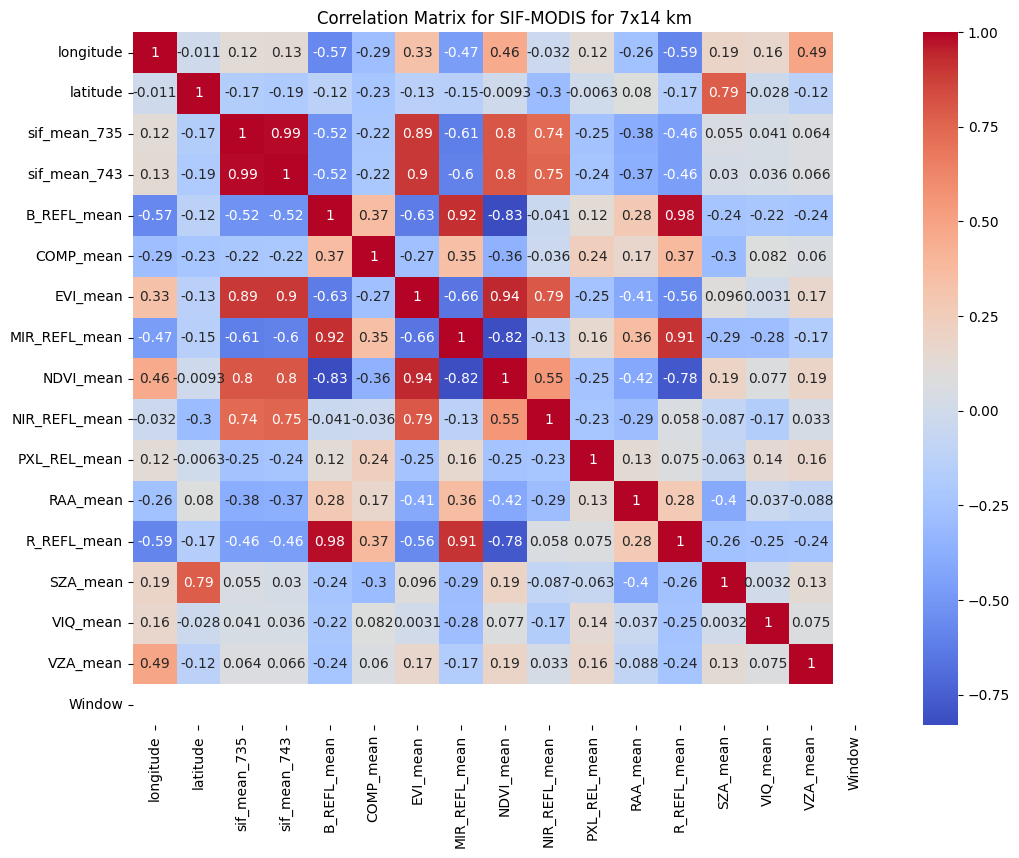

In [74]:
corr = three_data.corr()

plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix for SIF-MODIS for 3.5x7 km')
sns.heatmap(corr, cmap='coolwarm', annot=True)

corr = seven_data.corr()

plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix for SIF-MODIS for 7x14 km')
sns.heatmap(corr, cmap='coolwarm', annot=True)

### Merge features

In [75]:
merged = []
merged = {
    'longitude': seven_data['longitude'].copy(),
    'latitude': seven_data['latitude'].copy(),
    'sif_743': seven_data['sif_mean_743'].copy(),
    'NDVI': seven_data['NDVI_mean'].copy(),
    'EVI': seven_data['EVI_mean'].copy(),
    'NIR': seven_data['NIR_REFL_mean'].copy(),
    'target_sif': three_data['sif_mean_743'].copy()
}

merged_df = pd.DataFrame(merged)
merged_df.head(5)

longitude   latitude   sif_743         NDVI          EVI          NIR  \
0 -100.502966  49.762859  0.691817  3972.114286  2281.788462  2287.819048   
1 -100.457106  49.762859  0.548354  3349.292453  1896.943396  2156.669811   
2 -100.365385  49.762859  0.333582  3063.990476  1692.438095  2054.323810   
3 -100.319525  49.762859  0.323240  3195.285714  1743.542857  2036.304762   
4 -100.273665  49.762859  0.294832  3379.736364  1842.990909  2069.290909   

   target_sif  
0    0.883585  
1    0.312943  
2    0.336108  
3    0.278045  
4    0.370085

In [76]:
test_three_data = []
test_three_data = {
    'longitude': three_data['longitude'].copy(),
    'latitude': three_data['latitude'].copy(),
    'sif_743': three_data['sif_mean_743'].copy(),
    'NDVI': three_data['NDVI_mean'].copy(),
    'EVI': three_data['EVI_mean'].copy(),
    'NIR': three_data['NIR_REFL_mean'].copy(),
}

test_three_df = pd.DataFrame(test_three_data)
test_three_df.head(5)

longitude   latitude   sif_743         NDVI          EVI          NIR
0 -100.502966  49.762859  0.883585  3345.600000  1904.458333  2201.040000
1 -100.457106  49.762859  0.312943  2888.346154  1561.538462  1983.769231
2 -100.365385  49.762859  0.336108  3011.500000  1640.576923  1999.461538
3 -100.319525  49.762859  0.278045  3622.807692  2041.807692  2189.500000
4 -100.273665  49.762859  0.370085  3345.304348  1786.304348  2002.739130

In [77]:
merged_df.sample(frac=1, ignore_index=True)
test_three_df.sample(frac=1, ignore_index=True)

longitude   latitude   sif_743         NDVI          EVI          NIR
0     -94.908004  43.789090  0.043834  3158.000000  1474.714286  1654.214286
1     -96.788278  46.996061  0.183837  3336.961538  1738.384615  1875.961538
2     -99.127156  47.058942  0.469841  3242.100000  1737.466667  2013.633333
3     -96.146233  48.379460  0.560002  4560.653846  2663.269231  2422.720000
4     -96.329675  48.127933  0.754660  4711.038462  2642.740741  2290.037037
...          ...        ...       ...          ...          ...          ...
16598 -95.045585  47.373351  1.674619  7112.100000  4346.900000  2876.633333
16599 -96.146233  48.316578  0.905795  5062.500000  2950.166667  2509.466667
16600 -96.054512  43.914853  0.823154  5393.968750  3418.656250  2874.093750
16601 -98.806133  43.914853  1.705423  5628.156250  3631.625000  2948.218750
16602 -97.797206  47.247588  0.195649  2691.480000  1491.923077  2014.692308

[16603 rows x 6 columns]

In [78]:
from sklearn.preprocessing import StandardScaler

merged_df['diff_sif'] = merged_df['target_sif'] - merged_df['sif_743']

input_scaled_df = merged_df[['sif_743', 'NDVI', 'EVI', 'NIR', 'target_sif', 'diff_sif']]

input_scaled_df.head(5)

sif_743         NDVI          EVI          NIR  target_sif  diff_sif
0  0.691817  3972.114286  2281.788462  2287.819048    0.883585  0.191768
1  0.548354  3349.292453  1896.943396  2156.669811    0.312943 -0.235411
2  0.333582  3063.990476  1692.438095  2054.323810    0.336108  0.002526
3  0.323240  3195.285714  1743.542857  2036.304762    0.278045 -0.045195
4  0.294832  3379.736364  1842.990909  2069.290909    0.370085  0.075253

### Implement Local Binary Pattern for Localization

In [79]:
#  We implement Local Binary Pattern to localize features over the auxiliary data. This will help in capturing input sif_743
#  which is spread over different temporal timeframe to map features over consistent auxiliary data.
#  It will also help to preserve neighbourhood connections and will help in gap-filling tasks.

In [80]:
import cv2


def lbp(image, P=4, R=1):               # pass our matrix as image
    if image.dtype != np.uint8:
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    lbp_image = np.zeros_like(image, dtype=np.uint8)
    height, width = image.shape

    # Set neighborhood offset. For now, we set 1 pixel around 
    offsets = [(0, R), (R, R), (R, 0), (R, -R),
               (0, -R), (-R, -R), (-R, 0), (-R, R)]

    for i in range(height):
        for j in range(width):
            center = image[i, j]
            binary_code = 0
            for k, (y_off, x_off) in enumerate(offsets):
                y, x = i + y_off, j + x_off
                if 0 <= y < height and 0 <= x < width:
                    binary_code |= (image[y, x] > center) << k
            lbp_image[i, j] = binary_code

    return lbp_image

### Convert features into geospatial matrix using lat, long coordinates, including LBP and sif_diff

In [81]:
#  siff_diff = sif_target - sif_743

In [82]:
def normalize_series(series):
    return (series - series.min()) / (series.max() - series.min())

def create_matrix(data, unique_lats, unique_lons):
    lat_to_row = {lat: idx for idx, lat in enumerate(unique_lats)}
    lon_to_col = {lon: idx for idx, lon in enumerate(unique_lons)}
    matrix = np.full((len(unique_lats), len(unique_lons)), np.nan)
    for _, row in data.iterrows():
        matrix[lat_to_row[row['latitude']], lon_to_col[row['longitude']]] = row['value']
    return matrix


# Normalize and create matrices for each feature, LBP will be created seperately 
data_sources = ['sif_743', 'NDVI', 'EVI', 'NIR', 'diff_sif']
unique_lats = sorted(seven_data['latitude'].unique())
unique_lons = sorted(seven_data['longitude'].unique())

matrices = {}
for data_source in data_sources:
    matrices[data_source] = create_matrix(pd.DataFrame({
        'latitude': seven_data['latitude'],
        'longitude': seven_data['longitude'],
        'value': normalize_series(input_scaled_df[data_source])
    }), unique_lats, unique_lons)

######          Create LBP matrix by executing LBP function
sif_743_matrix = matrices['sif_743']
lbp_matrix = lbp(sif_743_matrix)
matrices['lbp_sif_743'] = lbp_matrix


# Create target matrix
target_sif_matrix = create_matrix(pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': input_scaled_df['target_sif']
}), unique_lats, unique_lons)

C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\4154534741.py:6: RuntimeWarning: invalid value encountered in cast
  image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


### Generate required submatrices by cropping, augmenting features matrices

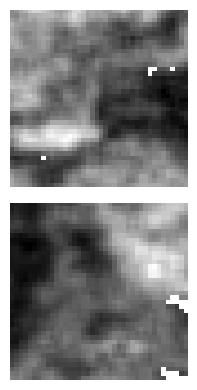

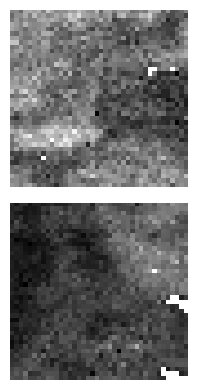

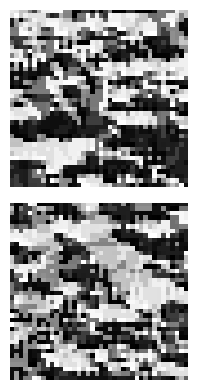

In [83]:
def get_random_top_left_corners(matrix_shape, submatrix_size, num_submatrices):
    max_row, max_col = matrix_shape[0] - submatrix_size[0], matrix_shape[1] - submatrix_size[1]
    return [(np.random.randint(0, max_row + 1), np.random.randint(0, max_col + 1)) for _ in range(num_submatrices)]

def plot_submatrices(submatrices, num_to_plot=5):
    fig, axes = plt.subplots(num_to_plot, 1, figsize=(8, num_to_plot * 2))
    for i in range(num_to_plot):
        axes[i].imshow(submatrices[i], cmap='gray')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


# Extract submatrices
submatrix_size = (40, 40)        # Length be chosen based on the overall shape for a single temporal aggregated dataset
num_submatrices = 200            # Same consideration as above
top_left_corners = get_random_top_left_corners(matrices['sif_743'].shape, submatrix_size, num_submatrices)

submatrices = {source: [] for source in data_sources + ['target_sif', 'lbp_sif_743']}
for row, col in top_left_corners:
    for source in data_sources:
        submatrices[source].append(matrices[source][row:row + submatrix_size[0], col:col + submatrix_size[1]])
    submatrices['target_sif'].append(target_sif_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]])
    submatrices['lbp_sif_743'].append(lbp_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]])

for key in submatrices:
    submatrices[key] = np.array(submatrices[key])

plot_submatrices(submatrices['sif_743'], num_to_plot=2)
plot_submatrices(submatrices['target_sif'], num_to_plot=2)
plot_submatrices(submatrices['lbp_sif_743'], num_to_plot=2)

### Do the same for Test Data OR you can split during model training

C:\Users\sudar\AppData\Local\Temp\ipykernel_11520\4154534741.py:6: RuntimeWarning: invalid value encountered in cast
  image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


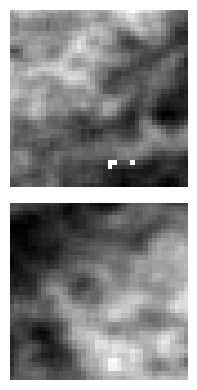

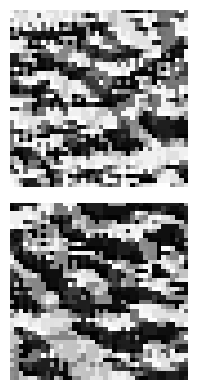

In [84]:
unique_lats_test = sorted(three_data['latitude'].unique())
unique_lons_test = sorted(three_data['longitude'].unique())

test_matrices = {}
for data_source in data_sources:
    test_matrices[data_source] = create_matrix(pd.DataFrame({
        'latitude': three_data['latitude'],
        'longitude': three_data['longitude'],
        'value': normalize_series(merged_df[data_source])
    }), unique_lats_test, unique_lons_test)

test_sif_743_matrix = test_matrices['sif_743']
test_lbp_matrix = lbp(test_sif_743_matrix)

test_matrices['lbp_sif_743'] = test_lbp_matrix

top_left_test_corners = get_random_top_left_corners(test_matrices['sif_743'].shape, submatrix_size, 10)

test_submatrices = {source: [] for source in data_sources + ['lbp_sif_743']}
for row, col in top_left_test_corners:
    for source in data_sources:
        test_submatrices[source].append(test_matrices[source][row:row + submatrix_size[0], col:col + submatrix_size[1]])
    test_submatrices['lbp_sif_743'].append(test_lbp_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]])

for key in test_submatrices:
    test_submatrices[key] = np.array(test_submatrices[key])

plot_submatrices(test_submatrices['sif_743'], num_to_plot=2)
plot_submatrices(test_submatrices['lbp_sif_743'], num_to_plot=2)

### Refill NaN again for newly generated submatrices

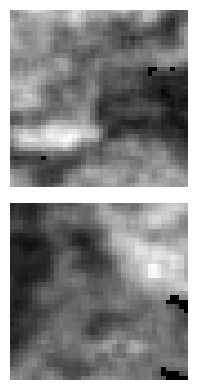

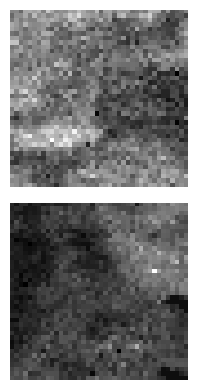

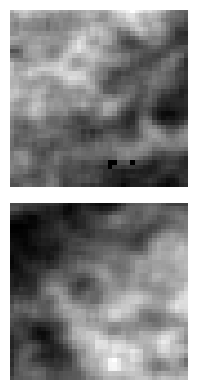

In [85]:
def replace_nan_with_zero(submatrices_dict):
    for key in submatrices_dict:
        submatrices_dict[key] = np.nan_to_num(submatrices_dict[key], nan=0)

replace_nan_with_zero(submatrices)

replace_nan_with_zero(test_submatrices)

for key, matrices in submatrices.items():
    assert not np.isnan(matrices).any(), f"NaN values found in {key}"

for key, matrices in test_submatrices.items():
    assert not np.isnan(matrices).any(), f"NaN values found in {key}"

plot_submatrices(submatrices['sif_743'], num_to_plot=2)
plot_submatrices(submatrices['target_sif'], num_to_plot=2)
plot_submatrices(test_submatrices['sif_743'], num_to_plot=2)

In [86]:
print(submatrices['NDVI'].shape)
print(submatrices['EVI'].shape)

(200, 40, 40)
(200, 40, 40)


In [87]:
# targe_sif_submatrices

In [88]:
submatrices_combined = submatrices

In [89]:
submatrices['lbp_sif_743'].shape

(200, 40, 40)

## U-NET Model Training and Testing

### Format Input-Target Dataset (converting to tensors)

In [90]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

class SpatialDataset(Dataset):
    def __init__(self, sif, ndvi, evi, nir, lbp, diff, target_sif):
        self.sif = torch.tensor(sif, dtype=torch.float32).unsqueeze(1)
        self.ndvi = torch.tensor(ndvi, dtype=torch.float32).unsqueeze(1)
        self.evi = torch.tensor(evi, dtype=torch.float32).unsqueeze(1)
        self.nir = torch.tensor(nir, dtype=torch.float32).unsqueeze(1)
        self.lbp = torch.tensor(lbp, dtype=torch.float32).unsqueeze(1)
        self.diff = torch.tensor(diff, dtype=torch.float32).unsqueeze(1)
        self.target_sif = torch.tensor(target_sif, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.sif)

    def __getitem__(self, idx):
        inputs = torch.cat((self.sif[idx], self.ndvi[idx], self.evi[idx], self.nir[idx], self.lbp[idx], self.diff[idx]), dim=0)
        target = self.target_sif[idx]
        return inputs, target

sif = submatrices['sif_743']
ndvi = submatrices['NDVI']
evi = submatrices['EVI']
nir = submatrices['NIR']
diff = submatrices['diff_sif']
lbp = submatrices['lbp_sif_743']
target_sif = submatrices['target_sif']

full_dataset = SpatialDataset(sif, lbp, ndvi, evi, nir, diff, target_sif)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Model Training

In [96]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        self.enc1 = self.conv_block(6, 16)                  # 6 input channels for 6 features
        self.enc2 = self.conv_block(16, 32)
        self.enc3 = self.conv_block(32, 64)
        self.enc4 = self.conv_block(64, 128)

        self.bottleneck = self.conv_block(128, 256)

        self.up4 = self.upconv_block(256, 128)
        self.dec4 = self.conv_block(256, 128)

        self.up3 = self.upconv_block(128, 64)
        self.dec3 = self.conv_block(128, 64)

        self.up2 = self.upconv_block(64, 32)
        self.dec2 = self.conv_block(64, 32)

        self.up1 = self.upconv_block(32, 16)
        self.dec1 = self.conv_block(32, 16)


        self.final_conv = nn.Conv2d(16, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        return block

    def upconv_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )
        return block

    def forward(self, x):

        enc1 = self.enc1(x)
        pool1 = F.max_pool2d(enc1, kernel_size=2, stride=2)

        enc2 = self.enc2(pool1)
        pool2 = F.max_pool2d(enc2, kernel_size=2, stride=2)

        enc3 = self.enc3(pool2)
        pool3 = F.max_pool2d(enc3, kernel_size=2, stride=2)

        enc4 = self.enc4(pool3)
        pool4 = F.max_pool2d(enc4, kernel_size=2, stride=2)


        bottleneck = self.bottleneck(pool4)

        up4 = self.up4(bottleneck)
        up4 = F.interpolate(up4, size=enc4.size()[2:], mode='bilinear', align_corners=False)
        up4 = torch.cat((up4, enc4), dim=1)
        dec4 = self.dec4(up4)

        up3 = self.up3(dec4)
        up3 = F.interpolate(up3, size=enc3.size()[2:], mode='bilinear', align_corners=False)
        up3 = torch.cat((up3, enc3), dim=1)
        dec3 = self.dec3(up3)

        up2 = self.up2(dec3)
        up2 = F.interpolate(up2, size=enc2.size()[2:], mode='bilinear', align_corners=False)
        up2 = torch.cat((up2, enc2), dim=1)
        dec2 = self.dec2(up2)

        up1 = self.up1(dec2)
        up1 = F.interpolate(up1, size=enc1.size()[2:], mode='bilinear', align_corners=False)
        up1 = torch.cat((up1, enc1), dim=1)
        dec1 = self.dec1(up1)

        output = self.final_conv(dec1)
        return output

In [97]:
model = UNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

num_epochs = 500
train_losses = []
test_losses = []
r2_scores = []
mae_scores = []
rmse_scores = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    model.eval()
    with torch.no_grad():
        test_running_loss = 0.0
        test_predictions = []
        test_targets = []
        for inputs, targets in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_running_loss += loss.item() * inputs.size(0)

            test_predictions.append(outputs)
            test_targets.append(targets)

        test_epoch_loss = test_running_loss / len(test_dataset)
        test_losses.append(test_epoch_loss)

        test_predictions = torch.cat(test_predictions, dim=0).cpu().numpy().reshape(-1, 40*40)
        test_targets = torch.cat(test_targets, dim=0).cpu().numpy().reshape(-1, 40*40)

        r2 = r2_score(test_targets, test_predictions)
        mae = mean_absolute_error(test_targets, test_predictions)
        rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))

        r2_scores.append(r2)
        mae_scores.append(mae)
        rmse_scores.append(rmse)

    print(f'Epoch [{epoch + 1}/{num_epochs}] Train Loss: {epoch_loss:.4f} Test Loss: {test_epoch_loss:.4f} R2 Score: {r2:.4f} MAE: {mae:.4f} RMSE: {rmse:.4f}')

Epoch [1/500] Train Loss: 0.4074 Test Loss: 0.2741 R2 Score: -0.3339 MAE: 0.4330 RMSE: 0.5236
Epoch [2/500] Train Loss: 0.2570 Test Loss: 0.2140 R2 Score: -0.0248 MAE: 0.3710 RMSE: 0.4626
Epoch [3/500] Train Loss: 0.2149 Test Loss: 0.2077 R2 Score: 0.0055 MAE: 0.3670 RMSE: 0.4558
Epoch [4/500] Train Loss: 0.2018 Test Loss: 0.2035 R2 Score: 0.0134 MAE: 0.3727 RMSE: 0.4511
Epoch [5/500] Train Loss: 0.1939 Test Loss: 0.1970 R2 Score: 0.0534 MAE: 0.3603 RMSE: 0.4439
Epoch [6/500] Train Loss: 0.1916 Test Loss: 0.1944 R2 Score: 0.0601 MAE: 0.3630 RMSE: 0.4409
Epoch [7/500] Train Loss: 0.1867 Test Loss: 0.1899 R2 Score: 0.0836 MAE: 0.3584 RMSE: 0.4358
Epoch [8/500] Train Loss: 0.1831 Test Loss: 0.1865 R2 Score: 0.0999 MAE: 0.3561 RMSE: 0.4319
Epoch [9/500] Train Loss: 0.1805 Test Loss: 0.1856 R2 Score: 0.1009 MAE: 0.3569 RMSE: 0.4308
Epoch [10/500] Train Loss: 0.1769 Test Loss: 0.1792 R2 Score: 0.1370 MAE: 0.3461 RMSE: 0.4234
Epoch [11/500] Train Loss: 0.1757 Test Loss: 0.1794 R2 Score: 0.139

Epoch [89/500] Train Loss: 0.0278 Test Loss: 0.0285 R2 Score: 0.8604 MAE: 0.1301 RMSE: 0.1690
Epoch [90/500] Train Loss: 0.0270 Test Loss: 0.0275 R2 Score: 0.8652 MAE: 0.1279 RMSE: 0.1659
Epoch [91/500] Train Loss: 0.0262 Test Loss: 0.0273 R2 Score: 0.8666 MAE: 0.1273 RMSE: 0.1651
Epoch [92/500] Train Loss: 0.0260 Test Loss: 0.0272 R2 Score: 0.8668 MAE: 0.1273 RMSE: 0.1649
Epoch [93/500] Train Loss: 0.0259 Test Loss: 0.0275 R2 Score: 0.8653 MAE: 0.1281 RMSE: 0.1658
Epoch [94/500] Train Loss: 0.0264 Test Loss: 0.0309 R2 Score: 0.8481 MAE: 0.1369 RMSE: 0.1757
Epoch [95/500] Train Loss: 0.0305 Test Loss: 0.0287 R2 Score: 0.8593 MAE: 0.1316 RMSE: 0.1694
Epoch [96/500] Train Loss: 0.0284 Test Loss: 0.0287 R2 Score: 0.8592 MAE: 0.1314 RMSE: 0.1694
Epoch [97/500] Train Loss: 0.0272 Test Loss: 0.0288 R2 Score: 0.8587 MAE: 0.1316 RMSE: 0.1696
Epoch [98/500] Train Loss: 0.0280 Test Loss: 0.0269 R2 Score: 0.8683 MAE: 0.1266 RMSE: 0.1641
Epoch [99/500] Train Loss: 0.0271 Test Loss: 0.0274 R2 Score

Epoch [176/500] Train Loss: 0.0202 Test Loss: 0.0229 R2 Score: 0.8879 MAE: 0.1166 RMSE: 0.1512
Epoch [177/500] Train Loss: 0.0200 Test Loss: 0.0228 R2 Score: 0.8884 MAE: 0.1163 RMSE: 0.1509
Epoch [178/500] Train Loss: 0.0199 Test Loss: 0.0227 R2 Score: 0.8885 MAE: 0.1162 RMSE: 0.1508
Epoch [179/500] Train Loss: 0.0198 Test Loss: 0.0228 R2 Score: 0.8885 MAE: 0.1161 RMSE: 0.1508
Epoch [180/500] Train Loss: 0.0198 Test Loss: 0.0227 R2 Score: 0.8887 MAE: 0.1160 RMSE: 0.1508
Epoch [181/500] Train Loss: 0.0197 Test Loss: 0.0227 R2 Score: 0.8890 MAE: 0.1159 RMSE: 0.1505
Epoch [182/500] Train Loss: 0.0196 Test Loss: 0.0227 R2 Score: 0.8889 MAE: 0.1159 RMSE: 0.1505
Epoch [183/500] Train Loss: 0.0195 Test Loss: 0.0227 R2 Score: 0.8885 MAE: 0.1161 RMSE: 0.1508
Epoch [184/500] Train Loss: 0.0194 Test Loss: 0.0227 R2 Score: 0.8889 MAE: 0.1159 RMSE: 0.1505
Epoch [185/500] Train Loss: 0.0193 Test Loss: 0.0226 R2 Score: 0.8891 MAE: 0.1158 RMSE: 0.1504
Epoch [186/500] Train Loss: 0.0192 Test Loss: 0.02

Epoch [263/500] Train Loss: 0.0150 Test Loss: 0.0222 R2 Score: 0.8911 MAE: 0.1132 RMSE: 0.1489
Epoch [264/500] Train Loss: 0.0152 Test Loss: 0.0226 R2 Score: 0.8890 MAE: 0.1143 RMSE: 0.1504
Epoch [265/500] Train Loss: 0.0153 Test Loss: 0.0224 R2 Score: 0.8899 MAE: 0.1138 RMSE: 0.1496
Epoch [266/500] Train Loss: 0.0150 Test Loss: 0.0223 R2 Score: 0.8906 MAE: 0.1133 RMSE: 0.1492
Epoch [267/500] Train Loss: 0.0149 Test Loss: 0.0222 R2 Score: 0.8908 MAE: 0.1132 RMSE: 0.1491
Epoch [268/500] Train Loss: 0.0148 Test Loss: 0.0223 R2 Score: 0.8903 MAE: 0.1134 RMSE: 0.1495
Epoch [269/500] Train Loss: 0.0148 Test Loss: 0.0227 R2 Score: 0.8883 MAE: 0.1146 RMSE: 0.1507
Epoch [270/500] Train Loss: 0.0167 Test Loss: 0.0282 R2 Score: 0.8616 MAE: 0.1294 RMSE: 0.1681
Epoch [271/500] Train Loss: 0.0183 Test Loss: 0.0254 R2 Score: 0.8751 MAE: 0.1220 RMSE: 0.1593
Epoch [272/500] Train Loss: 0.0172 Test Loss: 0.0224 R2 Score: 0.8904 MAE: 0.1136 RMSE: 0.1495
Epoch [273/500] Train Loss: 0.0168 Test Loss: 0.02

Epoch [350/500] Train Loss: 0.0170 Test Loss: 0.0214 R2 Score: 0.8948 MAE: 0.1115 RMSE: 0.1464
Epoch [351/500] Train Loss: 0.0168 Test Loss: 0.0215 R2 Score: 0.8944 MAE: 0.1116 RMSE: 0.1468
Epoch [352/500] Train Loss: 0.0167 Test Loss: 0.0215 R2 Score: 0.8945 MAE: 0.1115 RMSE: 0.1466
Epoch [353/500] Train Loss: 0.0165 Test Loss: 0.0217 R2 Score: 0.8932 MAE: 0.1125 RMSE: 0.1475
Epoch [354/500] Train Loss: 0.0167 Test Loss: 0.0218 R2 Score: 0.8927 MAE: 0.1127 RMSE: 0.1478
Epoch [355/500] Train Loss: 0.0165 Test Loss: 0.0213 R2 Score: 0.8956 MAE: 0.1109 RMSE: 0.1459
Epoch [356/500] Train Loss: 0.0164 Test Loss: 0.0216 R2 Score: 0.8942 MAE: 0.1114 RMSE: 0.1468
Epoch [357/500] Train Loss: 0.0164 Test Loss: 0.0223 R2 Score: 0.8905 MAE: 0.1135 RMSE: 0.1495
Epoch [358/500] Train Loss: 0.0165 Test Loss: 0.0214 R2 Score: 0.8951 MAE: 0.1110 RMSE: 0.1463
Epoch [359/500] Train Loss: 0.0160 Test Loss: 0.0215 R2 Score: 0.8943 MAE: 0.1118 RMSE: 0.1468
Epoch [360/500] Train Loss: 0.0160 Test Loss: 0.02

Epoch [437/500] Train Loss: 0.0112 Test Loss: 0.0228 R2 Score: 0.8881 MAE: 0.1129 RMSE: 0.1509
Epoch [438/500] Train Loss: 0.0114 Test Loss: 0.0225 R2 Score: 0.8895 MAE: 0.1122 RMSE: 0.1499
Epoch [439/500] Train Loss: 0.0111 Test Loss: 0.0223 R2 Score: 0.8905 MAE: 0.1117 RMSE: 0.1493
Epoch [440/500] Train Loss: 0.0111 Test Loss: 0.0225 R2 Score: 0.8892 MAE: 0.1125 RMSE: 0.1501
Epoch [441/500] Train Loss: 0.0110 Test Loss: 0.0224 R2 Score: 0.8898 MAE: 0.1120 RMSE: 0.1498
Epoch [442/500] Train Loss: 0.0112 Test Loss: 0.0231 R2 Score: 0.8866 MAE: 0.1136 RMSE: 0.1521
Epoch [443/500] Train Loss: 0.0125 Test Loss: 0.0226 R2 Score: 0.8888 MAE: 0.1126 RMSE: 0.1503
Epoch [444/500] Train Loss: 0.0112 Test Loss: 0.0224 R2 Score: 0.8899 MAE: 0.1119 RMSE: 0.1497
Epoch [445/500] Train Loss: 0.0111 Test Loss: 0.0225 R2 Score: 0.8895 MAE: 0.1120 RMSE: 0.1500
Epoch [446/500] Train Loss: 0.0108 Test Loss: 0.0224 R2 Score: 0.8899 MAE: 0.1118 RMSE: 0.1497
Epoch [447/500] Train Loss: 0.0110 Test Loss: 0.02

### Visualize Model Performance and Results

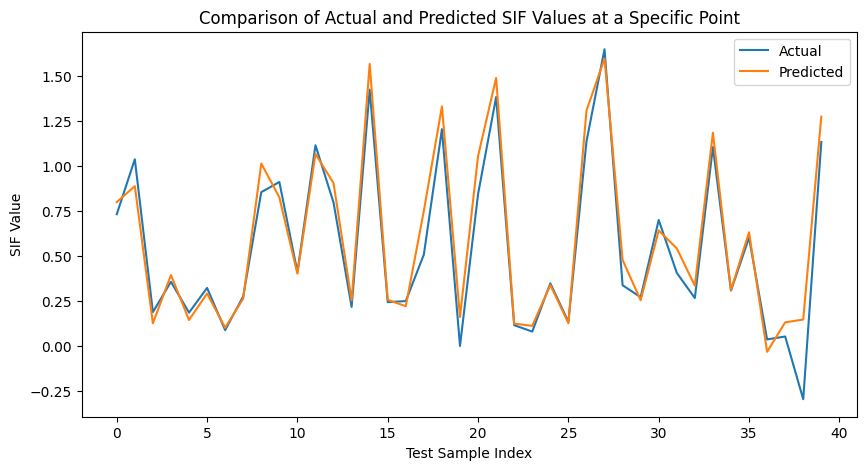

In [98]:
test_targets_np = test_targets.cpu().numpy() if isinstance(test_targets, torch.Tensor) else test_targets
test_predictions_np = test_predictions.cpu().numpy() if isinstance(test_predictions, torch.Tensor) else test_predictions

test_targets_np = test_targets_np.reshape(-1, 1, 40, 40)
test_predictions_np = test_predictions_np.reshape(-1, 1, 40, 40)

point_x, point_y = 20, 20  # Center point

targets_point = test_targets_np[:, 0, point_x, point_y]
predictions_point = test_predictions_np[:, 0, point_x, point_y]

plt.figure(figsize=(10, 5))
plt.plot(targets_point, label='Actual')
plt.plot(predictions_point, label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('SIF Value')
plt.title('Comparison of Actual and Predicted SIF Values at a Specific Point')
plt.legend()
plt.show()

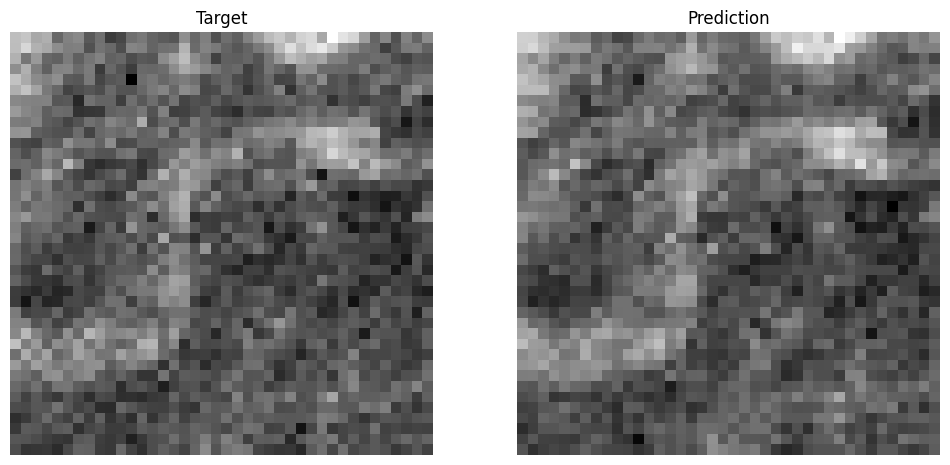

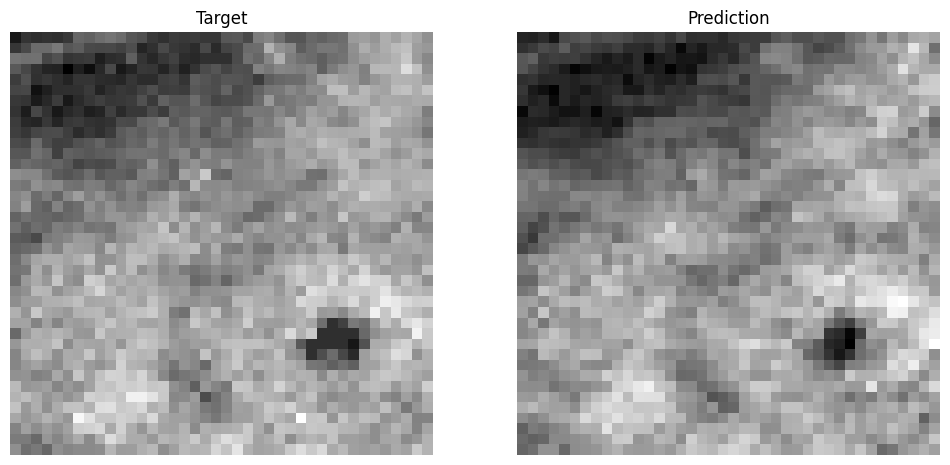

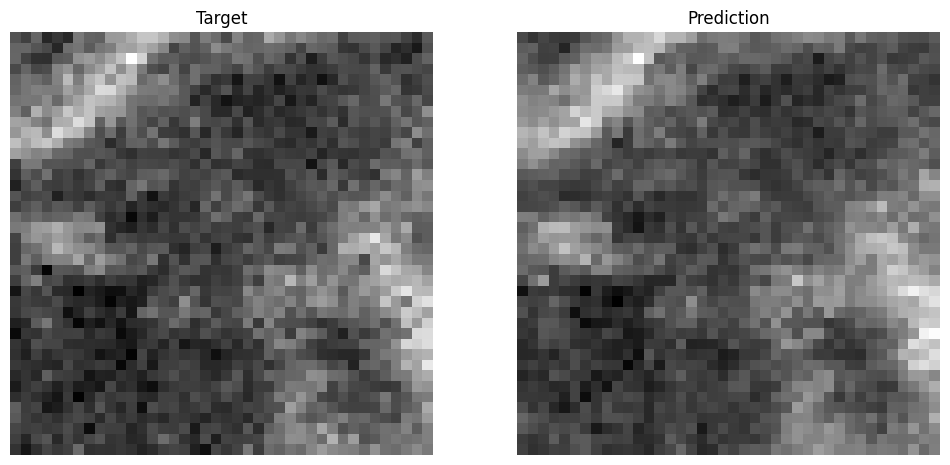

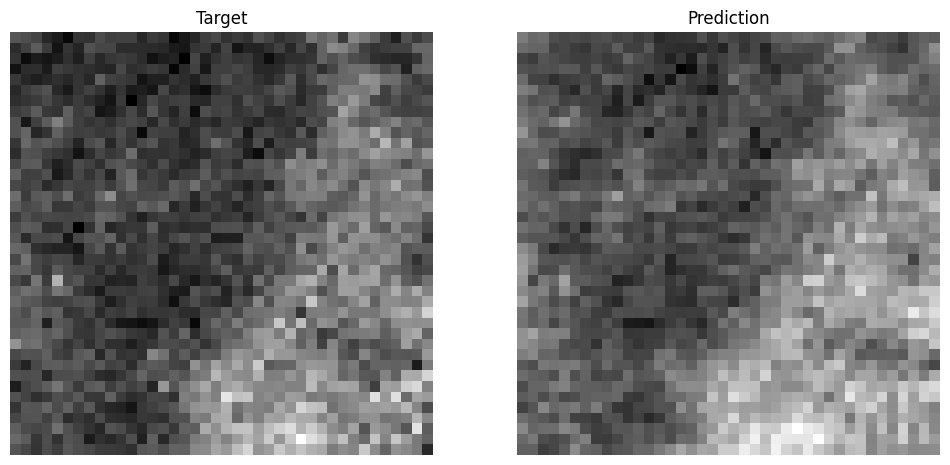

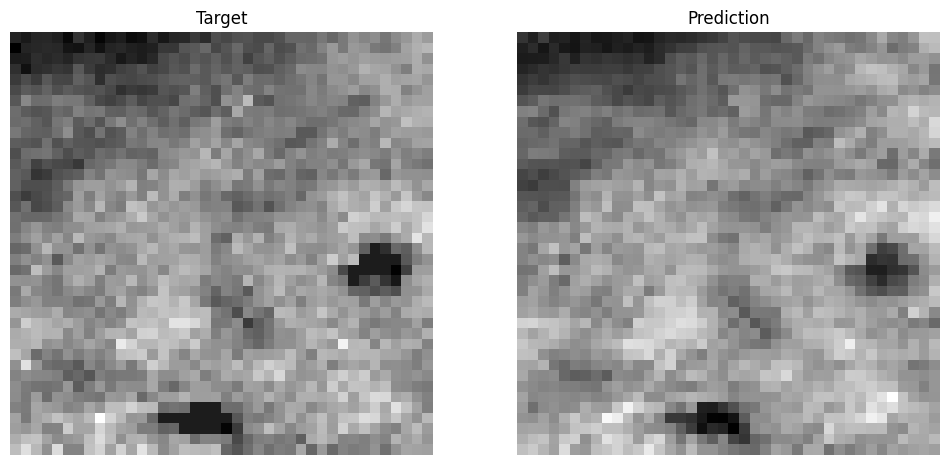

In [99]:
test_targets_np = test_targets.reshape(-1, 1, 40, 40)
test_predictions_np = test_predictions.reshape(-1, 1, 40, 40)

import matplotlib.pyplot as plt

def visualize_target_vs_prediction(targets, predictions, index):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(targets[index, 0, :, :], cmap='gray')
    axes[0].set_title('Target')
    axes[0].axis('off')

    axes[1].imshow(predictions[index, 0, :, :], cmap='gray')
    axes[1].set_title('Prediction')
    axes[1].axis('off')

    plt.show()

visualize_target_vs_prediction(test_targets_np, test_predictions_np, index=5)
visualize_target_vs_prediction(test_targets_np, test_predictions_np, index=20)
visualize_target_vs_prediction(test_targets_np, test_predictions_np, index=4)
visualize_target_vs_prediction(test_targets_np, test_predictions_np, index=16)
visualize_target_vs_prediction(test_targets_np, test_predictions_np, index=11)